In [5]:
# -------------------------------------------------
# Step 0 ËØªÂèñ h5ad
# -------------------------------------------------
import anndata, numpy as np

adata = anndata.read_h5ad("z-scaled_w_normalized.h5ad")
X = adata.X            # Ëã•ÊòØÁ®ÄÁñèÁü©ÈòµÔºåÂêéÈù¢‰ºöËá™Âä®Â§ÑÁêÜ

# -------------------------------------------------
# Step 1 Ê£ÄÊü• z‚Äëscore Ê†áÂáÜÂåñ
# -------------------------------------------------
#   ÂØπÊØè‰∏™Âü∫Âõ†ÔºàÂàóÔºâËÆ°ÁÆóÂùáÂÄº & Ê†áÂáÜÂ∑Æ
gene_means = np.asarray(X.mean(axis=0)).ravel()   # shape = (n_genes,)
gene_stds  = np.asarray(X.std(axis=0)).ravel()

print("Âü∫Âõ†ÂùáÂÄºÔºàÂâç 5 ‰∏™Ôºâ:", gene_means[:5])
print("Âü∫Âõ†Ê†áÂáÜÂ∑ÆÔºàÂâç 5 ‰∏™Ôºâ:", gene_stds[:5])

is_centered   = np.allclose(gene_means, 0, atol=1e-2)
is_unitvar    = np.allclose(gene_stds,  1, atol=1e-2)

if is_centered and is_unitvar:
    print("‚úÖ Êï∞ÊçÆÁúã‰∏äÂéªÂ∑≤ÂÅö z‚Äëscore Ê†áÂáÜÂåñ")
else:
    print("‚ö†Ô∏è  Êï∞ÊçÆÂ∞öÊú™ÂÆåÂÖ®Ê†áÂáÜÂåñÔºàÊàñÂÅèÂ∑ÆËæÉÂ§ßÔºâÔºåÂêéÁª≠ÈúÄÊâßË°å z‚Äëscale")

# -------------------------------------------------
# Step 2 Ê£ÄÊü• log‚ÇÇ(x+1) ËΩ¨Êç¢
# -------------------------------------------------
#   ÁªèÈ™åËßÑÂàôÔºölog ËΩ¨Êç¢ÂêéÊï∞ÂÄº‰∏ç‰ºöÂá∫Áé∞ÂæàÂ§ßÁöÑÊï¥Êï∞Ôºå‰πü‰∏ç‰ºöÊúâË¥üÂÄº
vals_sample = np.asarray(X[:100].todense() if hasattr(X, "todense") else X[:100])

print("\nÊï∞ÂÄºËåÉÂõ¥Á§∫‰æãÔºö",
      f"min={vals_sample.min():.2f}, 25%={np.percentile(vals_sample,25):.2f}, "
      f"median={np.median(vals_sample):.2f}, 75%={np.percentile(vals_sample,75):.2f}, "
      f"max={vals_sample.max():.2f}")

if vals_sample.min() < 0:
    print("‚ö†Ô∏è  Â≠òÂú®Ë¥üÂÄº ‚Üí Êï∞ÊçÆÂ∫îËØ•Â∞öÊú™ËøõË°å log2(x+1) ÂèòÊç¢")
elif vals_sample.max() > 100:
    print("‚ö†Ô∏è  ÊúÄÂ§ßÂÄºÈùûÂ∏∏Â§ß ‚Üí ÂæàÂèØËÉΩ‰ªçÊòØÂéüÂßãËÆ°Êï∞ÔºåÈúÄÂÖàÂÅö log2(x+1)")
else:
    print("‚úÖ Êï∞ÂÄºÂàÜÂ∏ÉÁ¨¶Âêà log2(x+1) ÂêéÁöÑÂ∏∏ËßÅËåÉÂõ¥")

# -------------------------------------------------
# Â∞èÁªì
# Ê†πÊçÆ‰∏äËø∞‰∏§Â§ßÊ£ÄÊü•ÁªìÊûúÔºö
#   - ‰∏§‰∏™ ‚úÖ  ‚Üí ÂèØÁõ¥Êé•ËøõÂÖ• PCA
#   - ‰ªª‰∏Ä ‚ö†Ô∏è ‚Üí ÊåâËÆ∫ÊñáÈ°∫Â∫èË°•ÂÅö log2 ‚Üí z‚ÄëscaleÔºåÂÜçËøõË°å PCA


Âü∫Âõ†ÂùáÂÄºÔºàÂâç 5 ‰∏™Ôºâ: [-2.8413171e-03 -1.5472946e-02 -3.5268753e-03 -2.5529963e-09
 -7.5026829e-09]
Âü∫Âõ†Ê†áÂáÜÂ∑ÆÔºàÂâç 5 ‰∏™Ôºâ: [0.96788394 0.78388786 0.9594752  0.9991255  0.9991253 ]
‚ö†Ô∏è  Êï∞ÊçÆÂ∞öÊú™ÂÆåÂÖ®Ê†áÂáÜÂåñÔºàÊàñÂÅèÂ∑ÆËæÉÂ§ßÔºâÔºåÂêéÁª≠ÈúÄÊâßË°å z‚Äëscale

Êï∞ÂÄºËåÉÂõ¥Á§∫‰æãÔºö min=-5.43, 25%=-0.56, median=-0.20, 75%=0.25, max=10.00
‚ö†Ô∏è  Â≠òÂú®Ë¥üÂÄº ‚Üí Êï∞ÊçÆÂ∫îËØ•Â∞öÊú™ËøõË°å log2(x+1) ÂèòÊç¢


PC1 & PC2 Explained variance ratio: [0.0887533  0.06115788]


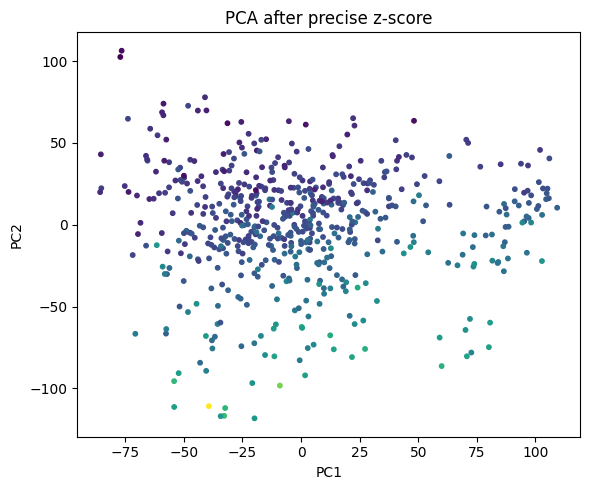

Clusters detected: 2
Silhouette score: 0.378


In [13]:
# ========= 0. ËØªÂèñ =========
import anndata, numpy as np, pandas as pd
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import hdbscan, matplotlib.pyplot as plt

adata = anndata.read_h5ad("z-scaled_w_normalized.h5ad")
X = adata.X.toarray() if hasattr(adata.X, "toarray") else adata.X   # Á®†ÂØÜÁü©Èòµ

# ========= 1. ÈáçÊñ∞ÂÅö z‚Äëscore (ddof=0ÔºåÊ†∑Êú¨Êï∞ÂÅöÂàÜÊØç) =========
X = (X - X.mean(axis=0)) / X.std(axis=0, ddof=0)

# ========= 2. PCA =========
pca = PCA(n_components=2, svd_solver="auto", random_state=42)
X_pca = pca.fit_transform(X)
print("PC1 & PC2 Explained variance ratio:", pca.explained_variance_ratio_)

# ========= 3. ÂèØËßÜÂåñ =========
plt.figure(figsize=(6,5))
color = adata.obs.iloc[:,0] if adata.obs.shape[1] else "blue"
plt.scatter(X_pca[:,0], X_pca[:,1], s=10, c=color, cmap="viridis")
plt.xlabel("PC1"); plt.ylabel("PC2"); plt.title("PCA after precise z‚Äëscore")
plt.tight_layout(); plt.show()

# ========= 4. HDBSCAN + Silhouette =========
labels = hdbscan.HDBSCAN(min_cluster_size=9).fit_predict(X_pca)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Clusters detected: {n_clusters}")

if n_clusters > 1:
    sil = silhouette_score(X_pca, labels)
    print(f"Silhouette score: {sil:.3f}")
else:
    print("Too few clusters for silhouette score")


In [12]:
import numpy as np, hdbscan
from sklearn.metrics import silhouette_score

best_sil  = -1
best_size = None
best_lab  = None

for mcs in range(3, 15):          # Ëá™Â∑±ÂÜ≥ÂÆöÊêúÁ¥¢ËåÉÂõ¥
    labels = hdbscan.HDBSCAN(min_cluster_size=mcs).fit_predict(X_pca)
    # Ëá≥Â∞ëË¶ÅÊúâ 2 ‰∏™ÁúüÂÆûÁ∞áÊâçËÉΩÁÆóÂàÜ
    if len(set(labels)) - (-1 in labels) < 2:
        continue
    sil = silhouette_score(X_pca, labels)
    if sil > best_sil:
        best_sil, best_size, best_lab = sil, mcs, labels

print(f"Best min_cluster_size = {best_size}, Silhouette = {best_sil:.3f}")


Best min_cluster_size = 9, Silhouette = 0.378


In [15]:
# ---------- ‰∏ÄÊ¨°ÊÄßÊ£ÄÊü•ÊâÄÊúâ metadata Â≠óÊÆµ ----------
import anndata, pandas as pd

adata = anndata.read_h5ad("z-scaled_w_normalized.h5ad")

print("üìë  adata.obs ÂàóË°®:")
print(adata.obs.columns.tolist())          # ÊâìÂç∞ÊâÄÊúâÂ≠óÊÆµÂêç

print("\nüëÄ  Ââç 5 Ë°åÈ¢ÑËßà:")
display(adata.obs.head())                  # Ëã•Âú® JupyterÔºåÂèØÊòæÁ§∫Ë°®Ê†º

# Â¶ÇÊûúÂàóÂ§™Â§öÔºåÂè™ÊÉ≥ÁúãÂàÜÁ±ªÂ≠óÊÆµÔºàÁ±ªÂà´ <= 20ÔºâÔºö
cat_cols = [c for c in adata.obs.columns if adata.obs[c].nunique() <= 20]
print("\nüóÇÔ∏è  ÊΩúÂú®ÁöÑÂàÜÁ±ªÂûãÂ≠óÊÆµ (n_unique ‚â§ 20):")
for c in cat_cols:
    print(f"  ‚Ä¢ {c}  ({adata.obs[c].nunique()} levels) ‚Üí {adata.obs[c].unique()[:5]}")


üìë  adata.obs ÂàóË°®:
['nCount_RNA', 'nFeature_RNA', 'cases.submitter_id', 'sample_id', 'total_expr', 'cases.consent_type', 'cases.days_to_consent', 'cases.disease_type', 'cases.lost_to_followup', 'demographic.age_at_index', 'demographic.age_is_obfuscated', 'demographic.country_of_residence_at_enrollment', 'demographic.days_to_birth', 'demographic.days_to_death', 'demographic.demographic_id', 'demographic.ethnicity', 'demographic.gender', 'demographic.race', 'demographic.submitter_id', 'demographic.vital_status', 'diagnoses.age_at_diagnosis', 'diagnoses.ajcc_pathologic_m', 'diagnoses.ajcc_pathologic_n', 'diagnoses.ajcc_pathologic_stage', 'diagnoses.ajcc_pathologic_t', 'diagnoses.ajcc_staging_system_edition', 'diagnoses.classification_of_tumor', 'diagnoses.days_to_diagnosis', 'diagnoses.diagnosis_id.x', 'diagnoses.diagnosis_is_primary_disease', 'diagnoses.figo_stage', 'diagnoses.figo_staging_edition_year', 'diagnoses.icd_10_code', 'diagnoses.laterality', 'diagnoses.morphology', 'diagn

nCount_RNA  nFeature_RNA cases.submitter_id  \
TCGA-05-4244-01A-01R-1107-07  2.002947e+07         17847       TCGA-05-4244   
TCGA-05-4249-01A-01R-1107-07  1.898802e+07         17906       TCGA-05-4249   
TCGA-05-4250-01A-01R-1107-07  1.989284e+07         17678       TCGA-05-4250   
TCGA-05-4382-01A-01R-1206-07  2.018984e+07         18291       TCGA-05-4382   
TCGA-05-4384-01A-01R-1755-07  1.870713e+07         17624       TCGA-05-4384   

                                                 sample_id    total_expr  \
TCGA-05-4244-01A-01R-1107-07  TCGA-05-4244-01A-01R-1107-07  2.002947e+07   
TCGA-05-4249-01A-01R-1107-07  TCGA-05-4249-01A-01R-1107-07  1.898802e+07   
TCGA-05-4250-01A-01R-1107-07  TCGA-05-4250-01A-01R-1107-07  1.989284e+07   
TCGA-05-4382-01A-01R-1206-07  TCGA-05-4382-01A-01R-1206-07  2.018984e+07   
TCGA-05-4384-01A-01R-1755-07  TCGA-05-4384-01A-01R-1755-07  1.870713e+07   

                             cases.consent_type cases.days_to_consent  \
TCGA-05-4244-01A-01R-1107-07   Informed Consent                     0   
TCGA-05-4249-01A-01R-1107-07   Informed Consent                     0   
TCGA-05-4250-01A-01R-1107-07   Informed Consent                     0   
TCGA-05-4382-01A-01R-1206-07   Informed Consent                     0   
TCGA-05-4384-01A-01R-1755-07   Informed Consent                     0   

                                        cases.disease_type  \
TCGA-05-4244-01A-01R-1107-07  Adenomas and Adenocarcinomas   
TCGA-05-4249-01A-01R-1107-07  Adenomas and Adenocarcinomas   
TCGA-05-4250-01A-01R-1107-07  Adenomas and Adenocarcinomas   
TCGA-05-4382-01A-01R-1206-07  Adenomas and Adenocarcinomas   
TCGA-05-4384-01A-01R-1755-07  Adenomas and Adenocarcinomas   

                             cases.lost_to_followup demographic.age_at_index  \
TCGA-05-4244-01A-01R-1107-07                    nan                       70   
TCGA-05-4249-01A-01R-1107-07                     No                       67   
TCGA-05-4250-01A-01R-1107-07                    nan                       79   
TCGA-05-4382-01A-01R-1206-07                     No                       68   
TCGA-05-4384-01A-01R-1755-07                     No                       66   

                              ... follow_ups.progression_or_recurrence  \
TCGA-05-4244-01A-01R-1107-07  ...                                  nan   
TCGA-05-4249-01A-01R-1107-07  ...                                  nan   
TCGA-05-4250-01A-01R-1107-07  ...                                  nan   
TCGA-05-4382-01A-01R-1206-07  ...                                  Yes   
TCGA-05-4384-01A-01R-1755-07  ...                                  Yes   

                             follow_ups.progression_or_recurrence_anatomic_site  \
TCGA-05-4244-01A-01R-1107-07                                                nan   
TCGA-05-4249-01A-01R-1107-07                                                nan   
TCGA-05-4250-01A-01R-1107-07                                                nan   
TCGA-05-4382-01A-01R-1206-07                                       Not Reported   
TCGA-05-4384-01A-01R-1755-07                                       Not Reported   

                             follow_ups.progression_or_recurrence_type  \
TCGA-05-4244-01A-01R-1107-07                                       nan   
TCGA-05-4249-01A-01R-1107-07                                       nan   
TCGA-05-4250-01A-01R-1107-07                                       nan   
TCGA-05-4382-01A-01R-1206-07                                   Distant   
TCGA-05-4384-01A-01R-1755-07                                   Distant   

                              follow_ups.submitter_id  \
TCGA-05-4244-01A-01R-1107-07  TCGA-05-4244_follow_up2   
TCGA-05-4249-01A-01R-1107-07  TCGA-05-4249_follow_up3   
TCGA-05-4250-01A-01R-1107-07   TCGA-05-4250_follow_up   
TCGA-05-4382-01A-01R-1206-07  TCGA-05-4382_follow_up3   
TCGA-05-4384-01A-01R-1755-07  TCGA-05-4384_follow_up4   

                             follow_ups.timepoint_category  \
TCGA-05-4244-


üóÇÔ∏è  ÊΩúÂú®ÁöÑÂàÜÁ±ªÂûãÂ≠óÊÆµ (n_unique ‚â§ 20):
  ‚Ä¢ cases.consent_type  (3 levels) ‚Üí ['Informed Consent', 'Consent by Death', 'Consent Waiver']
Categories (3, object): ['Consent Waiver', 'Consent by Death', 'Informed Consent']
  ‚Ä¢ cases.disease_type  (4 levels) ‚Üí ['Adenomas and Adenocarcinomas', 'Acinar Cell Neoplasms', 'Cystic, Mucinous and Serous Neoplasms', 'Ductal and Lobular Neoplasms']
Categories (4, object): ['Acinar Cell Neoplasms', 'Adenomas and Adenocarcinomas', 'Cystic, Mucinous and Serous Neoplasms', 'Ductal and Lobular Neoplasms']
  ‚Ä¢ cases.lost_to_followup  (3 levels) ‚Üí ['nan', 'No', 'Yes']
Categories (3, object): ['No', 'Yes', 'nan']
  ‚Ä¢ demographic.age_is_obfuscated  (2 levels) ‚Üí ['false', 'true']
Categories (2, object): ['false', 'true']
  ‚Ä¢ demographic.country_of_residence_at_enrollment  (9 levels) ‚Üí ['Germany', 'Russia', 'United States', 'nan', 'Vietnam']
Categories (9, object): ['Australia', 'Canada', 'Germany', 'Romania', ..., 'Ukraine', '

C:\Users\admin\AppData\Local\Temp\ipykernel_29792\1956577007.py:24: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(


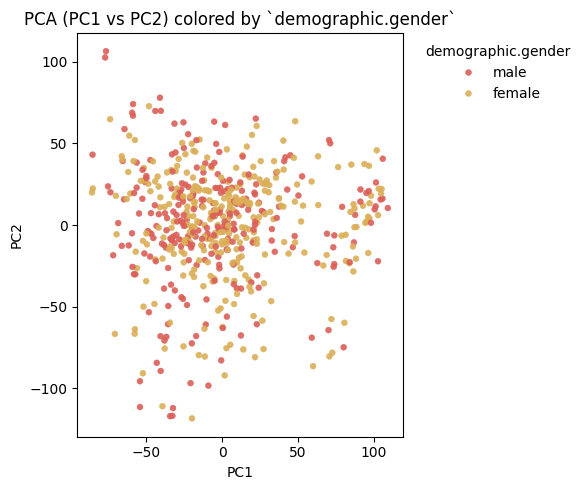

C:\Users\admin\AppData\Local\Temp\ipykernel_29792\1956577007.py:24: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.scatterplot(


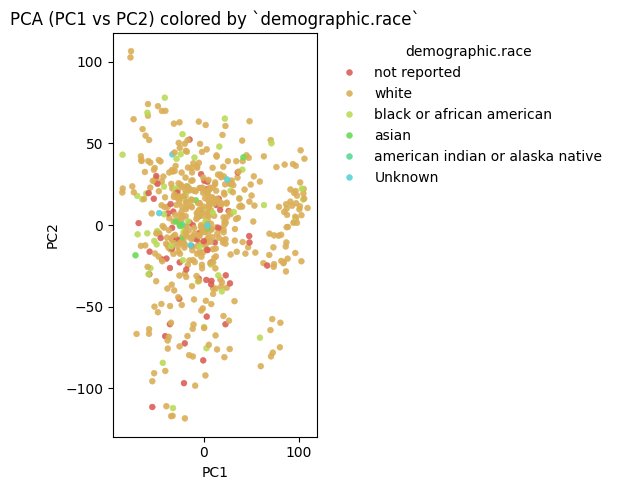

C:\Users\admin\AppData\Local\Temp\ipykernel_29792\1956577007.py:24: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  sns.scatterplot(


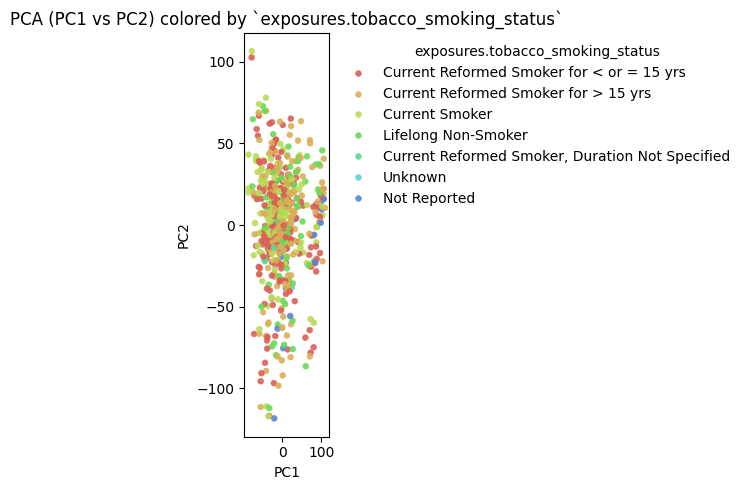

C:\Users\admin\AppData\Local\Temp\ipykernel_29792\1956577007.py:24: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.scatterplot(


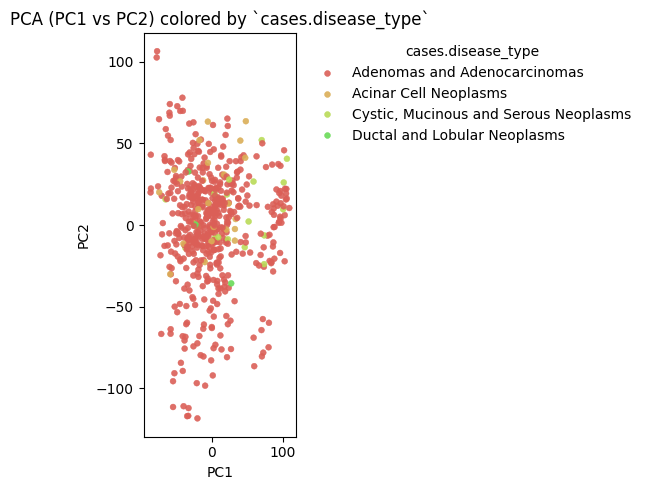

In [16]:
# ============ ‰æùËµñ ============
import anndata, numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Â∑≤Âä†ËΩΩÁöÑ AnnData„ÄÅÂ∑≤ËÆ°ÁÆóÁöÑ X_pca (n_samples √ó 2) Âèä pca ÂØπË±°
# Â¶ÇÊûúËøòÊ≤° pca ÂØπË±°ÔºåÂèØÂú®Ê≠§ÈáçÊñ∞ fit:
# pca2 = PCA(n_components=2, random_state=42).fit(X)
# X_pca = pca2.transform(X)

meta_cols = [
    'demographic.gender',
    'demographic.race',
    'exposures.tobacco_smoking_status',
    'cases.disease_type'
]

palette = sns.color_palette("hls", 10)   # ÊúÄÂ§ö 10 ÁßçÁ¶ªÊï£Ëâ≤

for col in meta_cols:
    if col not in adata.obs.columns:
        print(f"[skip] {col} ‰∏çÂ≠òÂú®"); continue
    
    plt.figure(figsize=(6,5))
    sns.scatterplot(
        x=X_pca[:,0], y=X_pca[:,1],
        hue=adata.obs[col].astype(str),  # ËΩ¨ str ‰øùËØÅÁ¶ªÊï£
        palette=palette, s=18, edgecolor=None, alpha=0.9
    )
    plt.title(f"PCA (PC1 vs PC2) colored by `{col}`")
    plt.xlabel("PC1"); plt.ylabel("PC2")
    plt.legend(title=col, bbox_to_anchor=(1.03, 1), loc='upper left', frameon=False)
    plt.tight_layout()
    plt.show()


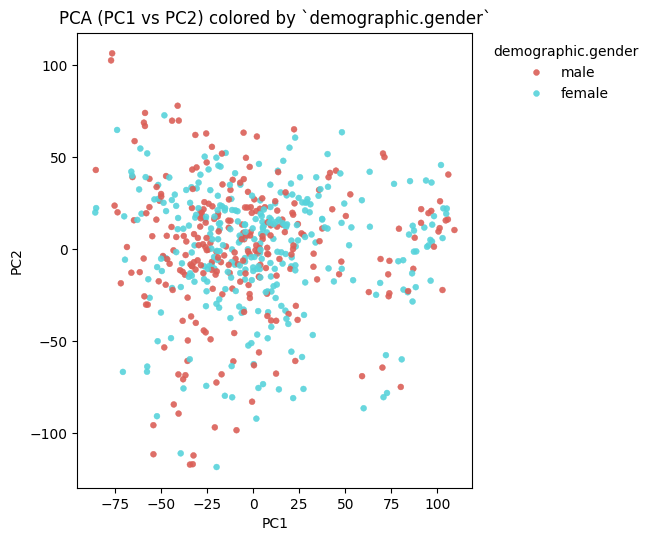

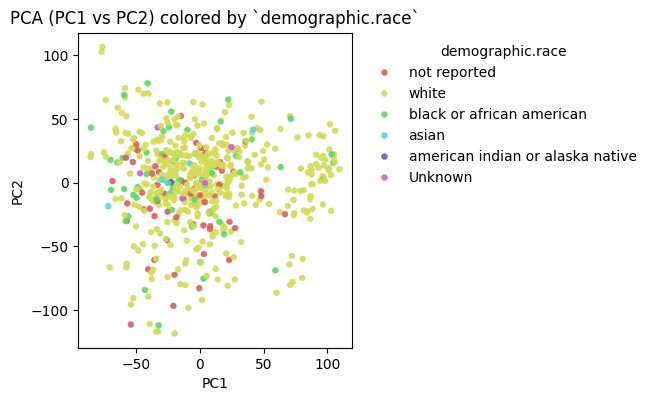

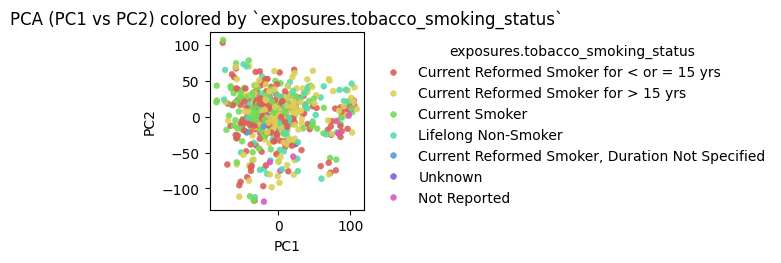

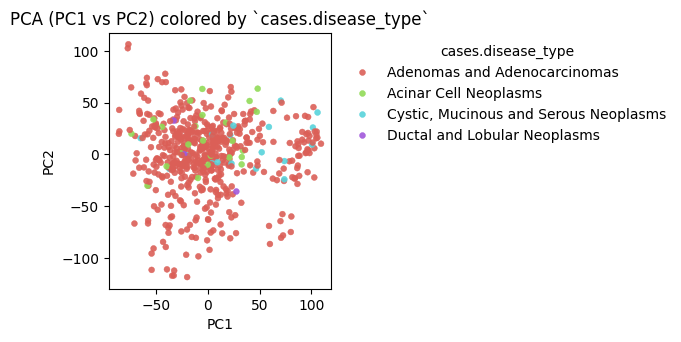

In [21]:
import seaborn as sns, matplotlib.pyplot as plt
import numpy as np

meta_cols = [
    'demographic.gender',
    'demographic.race',
    'exposures.tobacco_smoking_status',
    'cases.disease_type'
]

for col in meta_cols:
    if col not in adata.obs: 
        continue
    
    # ‰æùÊçÆÂÆûÈôÖÁ±ªÂà´Êï∞ÁîüÊàêÂØπÂ∫îÈ¢úËâ≤Êï∞
    n_cat = adata.obs[col].nunique()
    pal   = sns.color_palette("hls", n_cat)
    
    fig, ax = plt.subplots(figsize=(6,6))
    ax.set_aspect('equal')                    # ÊñπÂΩ¢ÂùêÊ†áÁ≥ª
    
    sns.scatterplot(
        x=X_pca[:,0], y=X_pca[:,1],
        hue=adata.obs[col].astype(str),
        palette=pal, s=18, edgecolor=None, alpha=0.9, ax=ax
    )
    ax.set_title(f"PCA (PC1 vs PC2) colored by `{col}`")
    ax.set_xlabel("PC1"); ax.set_ylabel("PC2")
    ax.legend(title=col, bbox_to_anchor=(1.02,1), loc='upper left',
              frameon=False)
    plt.tight_layout(); plt.show()


IndexError: index 0 is out of bounds for axis 0 with size 0

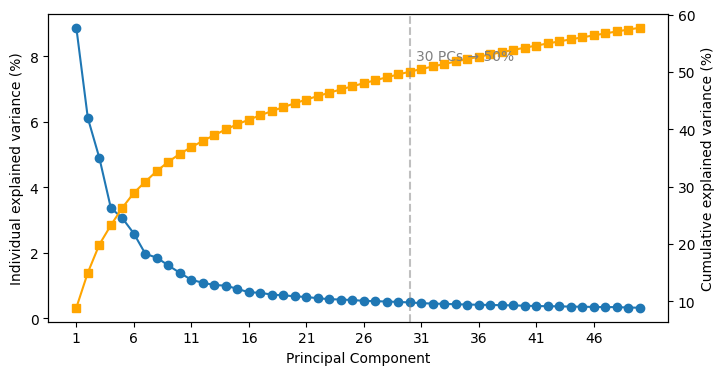

In [17]:
# -------- ËÆ°ÁÆóÂâç 50 PC ----------
pca50 = PCA(n_components=50, random_state=42).fit(X)
var_ratio = pca50.explained_variance_ratio_
cum_ratio = np.cumsum(var_ratio)

# -------- ÁªòÂõæ ----------
fig, ax1 = plt.subplots(figsize=(8,4))

ax1.plot(range(1,51), var_ratio*100, marker='o', linewidth=1.5)
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Individual explained variance (%)')
ax1.set_xticks(range(1,51,5))

# Á¥ØËÆ°ÊñπÂ∑ÆÔºàÂèå y ËΩ¥Ôºâ
ax2 = ax1.twinx()
ax2.plot(range(1,51), cum_ratio*100, marker='s', color='orange', linewidth=1.5)
ax2.set_ylabel('Cumulative explained variance (%)')

# ËæÖÂä©Á∫øÔºö50% ‰∏é 80%
for thr, clr in zip([0.5, 0.8], ['gray','gray']):
    pc_idx = np.where(cum_ratio >= thr)[0][0] + 1
    ax2.axvline(pc_idx, color=clr, linestyle="--", alpha=0.5)
    ax2.text(pc_idx+0.5, thr*100+2, f'{pc_idx} PCs ‚Üí {thr*100:.0f}%', color=clr)

fig.suptitle('Elbow plot: variance explained by first 50 PCs')
fig.tight_layout()
plt.show()


IndexError: index 0 is out of bounds for axis 0 with size 0

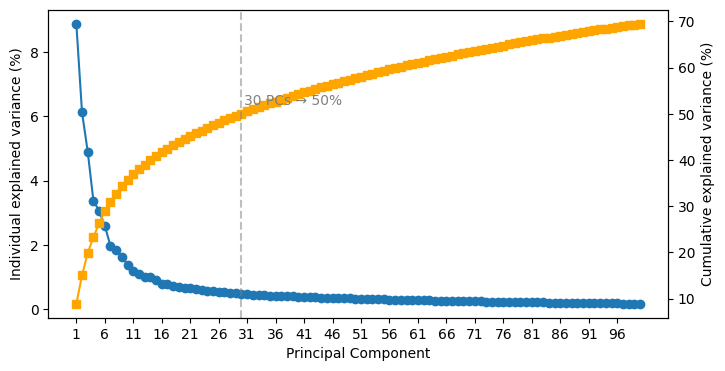

In [20]:
# -------- ËÆ°ÁÆóÂâç 100 PC ----------
pca100 = PCA(n_components=100, random_state=42).fit(X)
var_ratio = pca100.explained_variance_ratio_
cum_ratio = np.cumsum(var_ratio)

# -------- ÁªòÂõæ ----------
fig, ax1 = plt.subplots(figsize=(8,4))

ax1.plot(range(1,101), var_ratio*100, marker='o', linewidth=1.5)
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Individual explained variance (%)')
ax1.set_xticks(range(1,100,5))

# Á¥ØËÆ°ÊñπÂ∑ÆÔºàÂèå y ËΩ¥Ôºâ
ax2 = ax1.twinx()
ax2.plot(range(1,101), cum_ratio*100, marker='s', color='orange', linewidth=1.5)
ax2.set_ylabel('Cumulative explained variance (%)')

# ËæÖÂä©Á∫øÔºö50% ‰∏é 80%
for thr, clr in zip([0.5, 0.8], ['gray','gray']):
    pc_idx = np.where(cum_ratio >= thr)[0][0] + 1
    ax2.axvline(pc_idx, color=clr, linestyle="--", alpha=0.5)
    ax2.text(pc_idx+0.5, thr*100+2, f'{pc_idx} PCs ‚Üí {thr*100:.0f}%', color=clr)

fig.suptitle('Elbow plot: variance explained by first 100 PCs')
fig.tight_layout()
plt.show()


In [22]:
!pip install --upgrade plotly


Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
      --------------------------------------- 0.3/14.8 MB ? eta -:--:--
     -- ------------------------------------- 0.8/14.8 MB 1.9 MB/s eta 0:00:08
     ----- ---------------------------------- 2.1/14.8 MB 3.4 MB/s eta 0:00:04
     ------------ --------------------------- 4.7/14.8 MB 5.8 MB/s eta 0:00:02
     --------------------- ------------------ 7.9/14.8 MB 7.7 MB/s eta 0:00:01
     ------------------------------- -------- 11.5/14.8 MB 9.4 MB/s eta 0:00:01
     --------------------------------------  14.7/14.8 MB 10.3 MB/s eta 0:00:01
     --------------------------------------- 14.8/14.8 MB 10.2 MB/s eta 0:00:00


In [23]:
import anndata, pandas as pd, numpy as np, plotly.express as px
from sklearn.decomposition import PCA

adata = anndata.read_h5ad("z-scaled_w_normalized.h5ad")

# ---- 1) Á≤æÁ°Æ z-score Â∑≤ÂÅöÔºõÂ¶ÇÊûúÂ∑≤Êúâ X_pca Â∞±Áõ¥Êé•Áî® ----
pca = PCA(n_components=2, random_state=42).fit(adata.X)
X_pca = pca.transform(adata.X)

# ---- 2) ÁªÑË£Ö DataFrame ‰Ωú‰∏∫ Plotly ËæìÂÖ• ----
df = pd.DataFrame({
    "PC1": X_pca[:,0],
    "PC2": X_pca[:,1],
    "sample_id": adata.obs_names,                     # Ë°åÁ¥¢Âºï
    "gender": adata.obs["demographic.gender"].astype(str),
    "smoking": adata.obs["exposures.tobacco_smoking_status"].astype(str),
    "disease_type": adata.obs["cases.disease_type"].astype(str)
})

# ---- 3) Áîª‰∫§‰∫íÊï£ÁÇπ ----
fig = px.scatter(
    df, x="PC1", y="PC2",
    color="disease_type",                    # ‰πüÂèØÊç¢ÂÖ∂ÂÆÉÂ≠óÊÆµ
    hover_data=["sample_id", "gender", "smoking", "disease_type"],
    title="Interactive PCA (hover for metadata)"
)
fig.update_traces(marker=dict(size=6, line=dict(width=0)))   # Â∞èÂúÜÁÇπ
fig.write_html("PCA_interactive.html")       # ÁîüÊàêÁ¶ªÁ∫ø html
fig.show()                                   # Jupyter ÂÜÖÁõ¥Êé•ÂºπÁ™ó
